# ***Import Libraries***

In [96]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.18.0


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ***Read Dataset from DRIVE***

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
file = open('/content/drive/MyDrive/Colab Notebooks/HARDLS/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

In [100]:
processedList = []

# ***EDA***

In [101]:
for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)



Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [102]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [103]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [104]:
df = pd.DataFrame(data = processedList, columns = columns)
df.head()


,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [105]:
df.shape

(343416, 6)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [107]:
#Check for null values
df.isnull().sum()

,0
user,0
activity,0
time,0
x,0
y,0
z,0


In [108]:
df['activity'].value_counts()

,count
activity,
Walking,137375
Jogging,129392
Upstairs,35137
Downstairs,33358
Sitting,4599
Standing,3555


In [109]:
# Data Balance
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')
df['z'] = df['z'].astype('float')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [111]:
Fs=20
activities = df['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object', name='activity')

# ***Plotting the activities(x,y,z)***

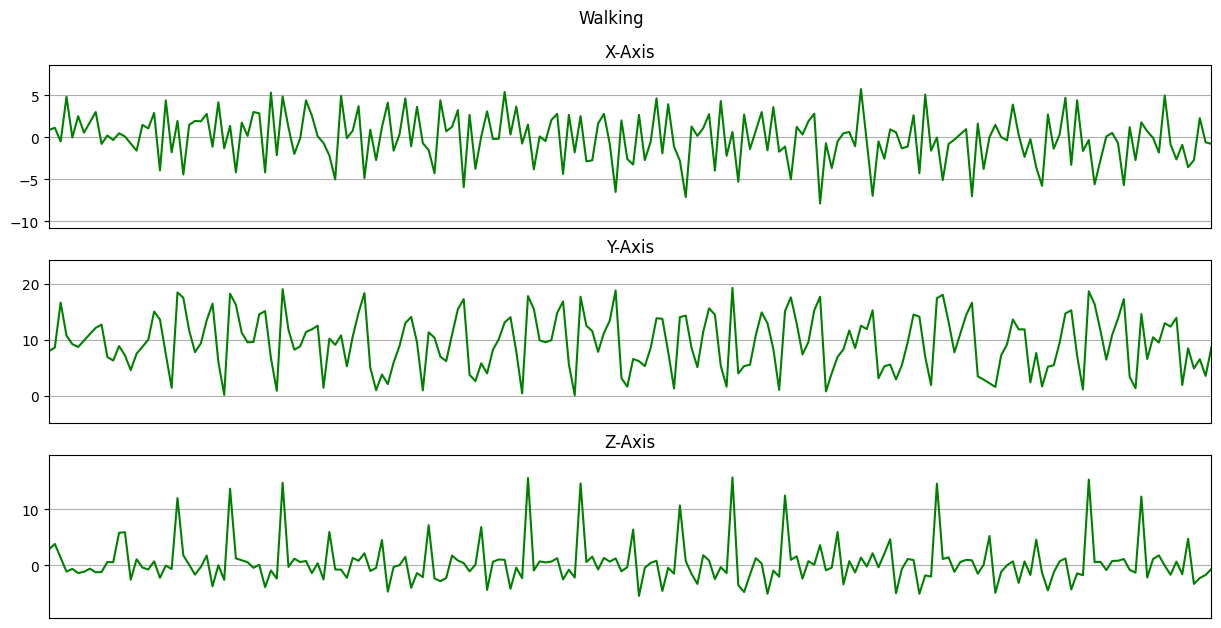

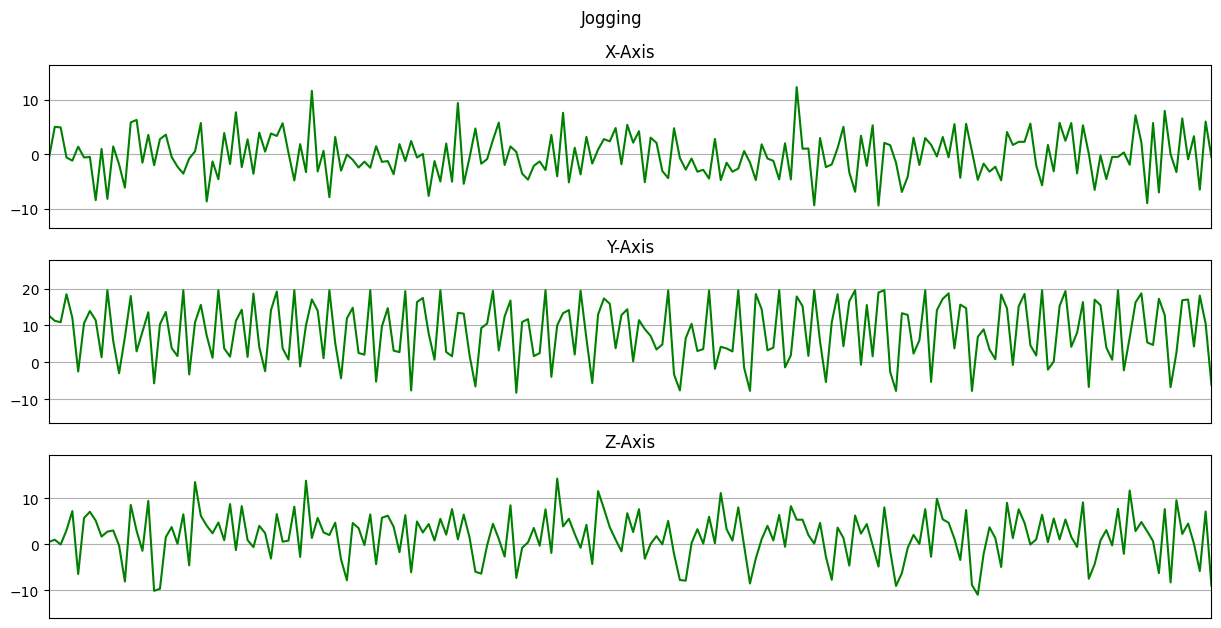

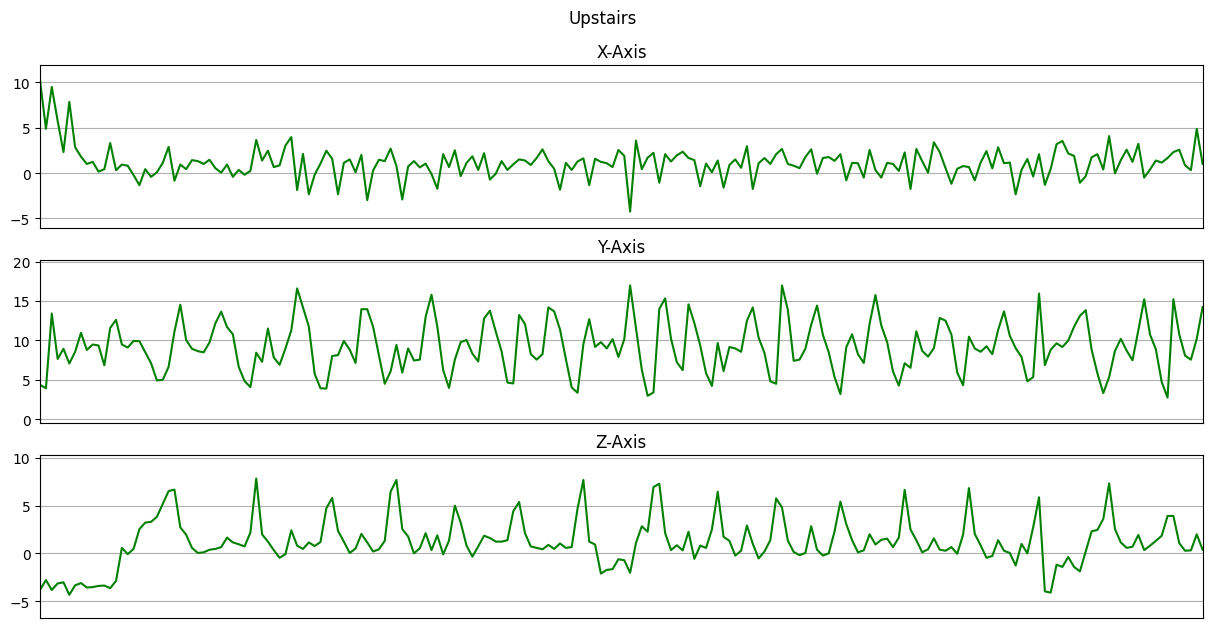

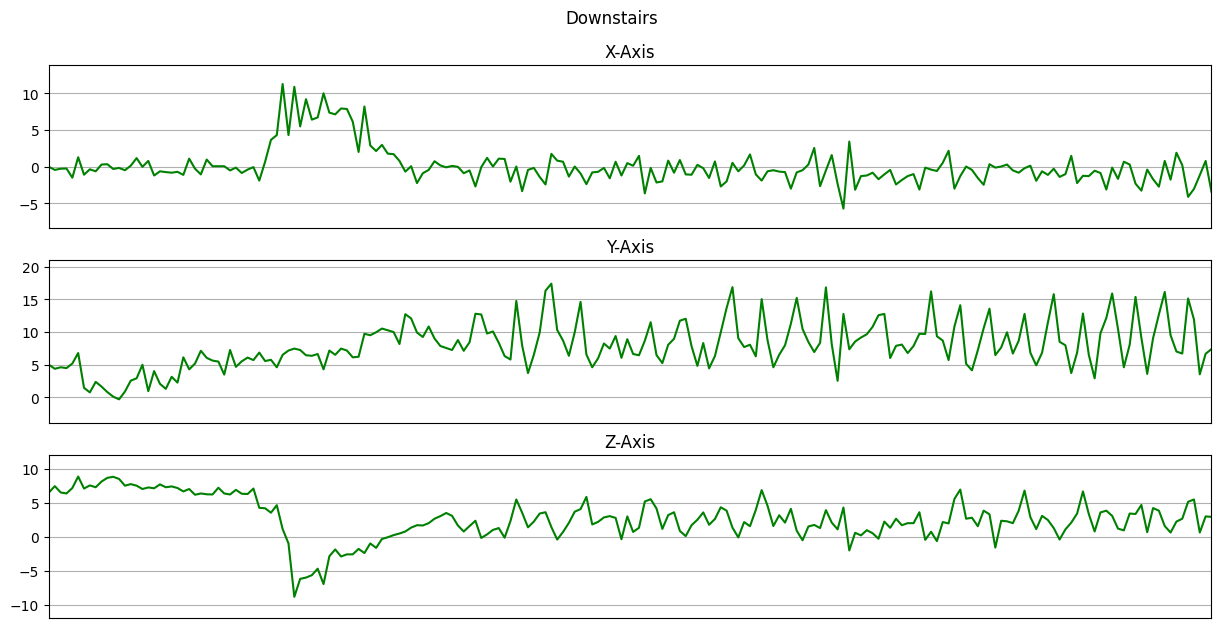

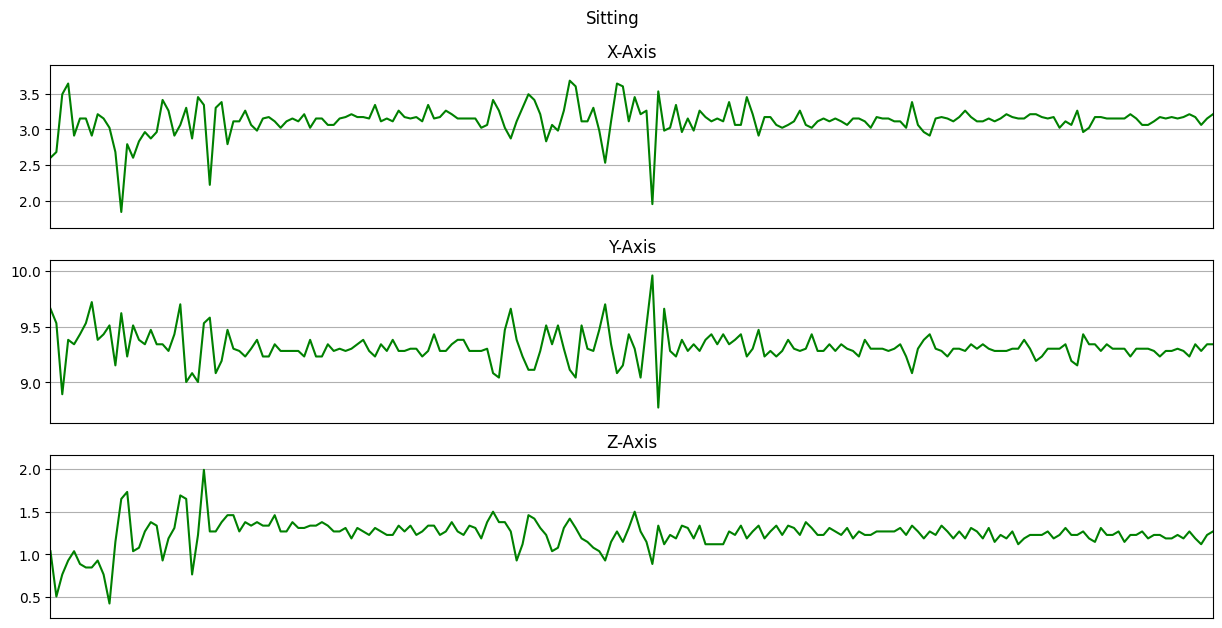

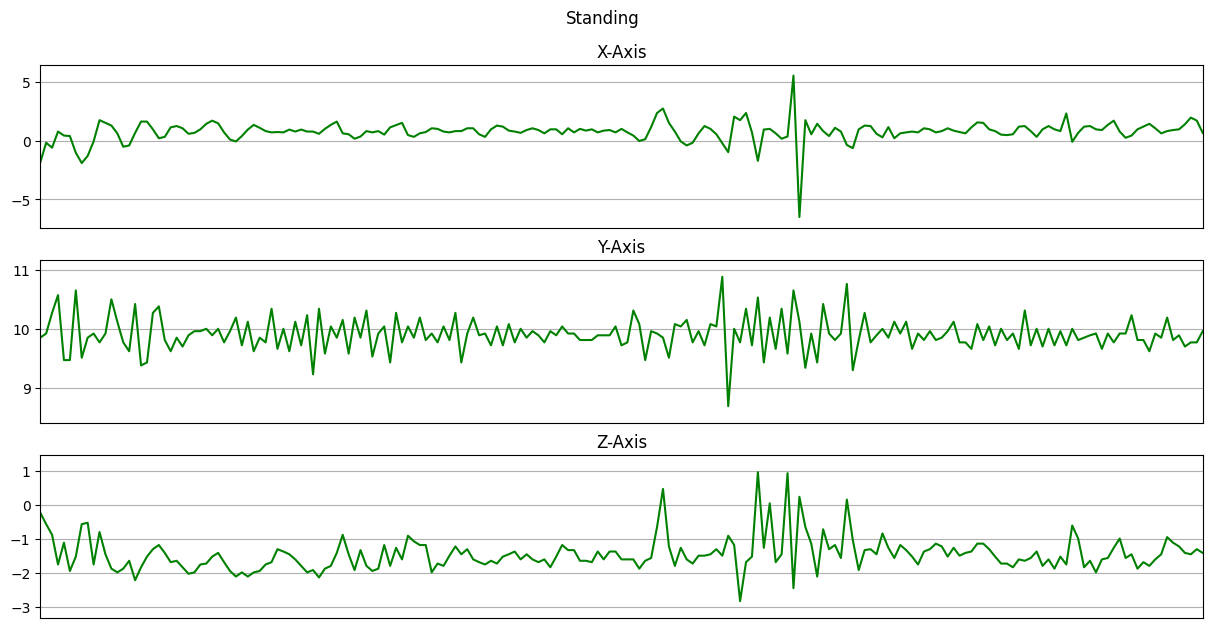

In [112]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    df_for_plot = df[(df['activity'] == activity)][:Fs*10]
    plot_activity(activity, df_for_plot)

In [113]:
#Drop unnecessary data
dff = df.drop(['user', 'time'], axis = 1).copy()
dff.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [114]:
dff['activity'].value_counts()

,count
activity,
Walking,137375
Jogging,129392
Upstairs,35137
Downstairs,33358
Sitting,4599
Standing,3555


# ***Balance the dataset for train test***

In [115]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

In [116]:
frames = [Walking, Jogging, Upstairs, Downstairs, Sitting, Standing]
balanced_data = pd.concat(frames)
balanced_data['activity'].value_counts()
balanced_data.shape

(21330, 6)

In [117]:
balanced_data.head()

,user,activity,time,x,y,z
597,33,Walking,49394992294000,0.844462,8.008764,2.792171
598,33,Walking,49395102310000,1.116869,8.621680,3.786457
599,33,Walking,49395202316000,-0.503953,16.657684,1.307553
600,33,Walking,49395302292000,4.794363,10.760075,-1.184970
601,33,Walking,49395412338000,-0.040861,9.234595,-0.694638


In [118]:
balanced_data['activity'].value_counts()

,count
activity,
Walking,3555
Jogging,3555
Upstairs,3555
Downstairs,3555
Sitting,3555
Standing,3555


In [119]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,user,activity,time,x,y,z,label
597,33,Walking,49394992294000,0.844462,8.008764,2.792171,5
598,33,Walking,49395102310000,1.116869,8.621680,3.786457,5
599,33,Walking,49395202316000,-0.503953,16.657684,1.307553,5
600,33,Walking,49395302292000,4.794363,10.760075,-1.184970,5
601,33,Walking,49395412338000,-0.040861,9.234595,-0.694638,5


In [120]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [121]:
# Standardizing data
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [122]:
#Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X


,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


In [123]:
# Frame preparation
import scipy.stats as stats

In [124]:

Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [125]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]

        # Retrieve the most often used label in this segment
        # label = stats.mode(df['label'][i: i + frame_size])[0][0] # This line was causing the error
        label = df['label'][i: i + frame_size].mode()[0] # This change fixes the error and gives the mode of the series instead of a numpy array
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels


In [126]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [127]:
X.shape, y.shape

((532, 80, 3), (532,))

# ***Train-Test Split***

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [129]:
X_train.shape, X_test.shape


((425, 80, 3), (107, 80, 3))

In [130]:

X_train[0].shape, X_test[0].shape


((80, 3), (80, 3))

In [131]:

X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

X_train[0].shape, X_test[0].shape


((80, 3, 1), (80, 3, 1))

# ***Model Preparation***

In [132]:

# 2D CNN Model
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 79, 2, 16)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 79, 2, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 78, 1, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 78, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2496)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       159,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,358 (634.21 KB)

 Trainable params: 162,358 (634.21 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:

history = model.fit(X_train, y_train, epochs =10, validation_data= (X_test, y_test), verbose=1)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.2354 - loss: 1.7305 - val_accuracy: 0.2991 - val_loss: 1.3628
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4059 - loss: 1.3331 - val_accuracy: 0.8411 - val_loss: 0.9509
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6471 - loss: 1.0083 - val_accuracy: 0.8318 - val_loss: 0.6630
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6989 - loss: 0.7579 - val_accuracy: 0.8411 - val_loss: 0.4737
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7943 - loss: 0.5899 - val_accuracy: 0.8879 - val_loss: 0.3707
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8560 - loss: 0.3982 - val_accuracy: 0.8972 - val_loss: 0.2893
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8791 - loss: 0.3737 - val_accuracy: 0.8785 - val_loss: 0.2621
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8997 - loss: 0.3145 - val_accuracy: 0.8879 - v

`Our Model is giving above 90% accuracy upon testing`

# ***Plot the curve***

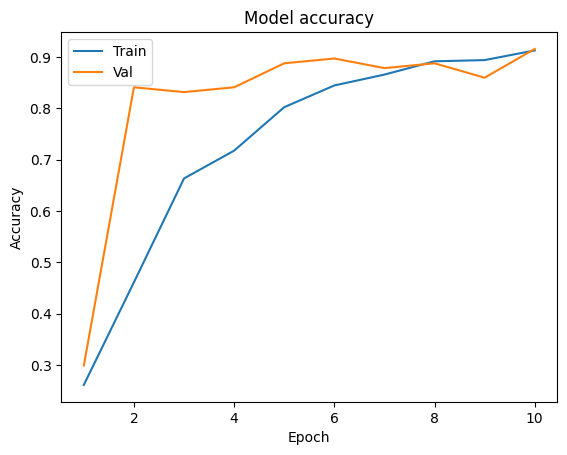

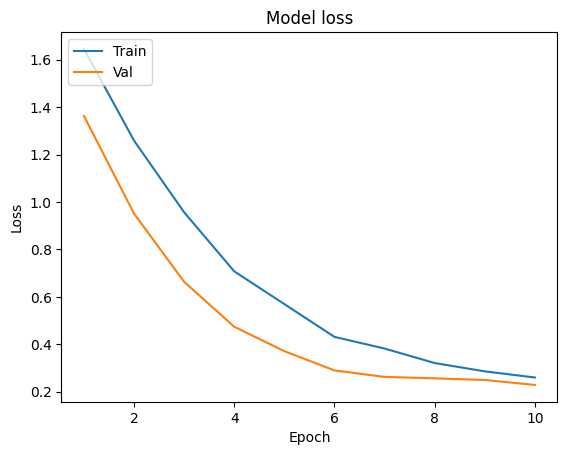

In [135]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


plot_learningCurve(history, 10)

In [136]:
#Confusion Matrix

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score

y_pred = np.argmax(model.predict(X_test), axis=-1)

y_pred



1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([4, 2, 2, 1, 1, 1, 5, 4, 2, 4, 3, 2, 0, 2, 3, 2, 1, 1, 2, 5, 0, 5,
       5, 1, 1, 0, 5, 3, 3, 1, 0, 4, 4, 5, 2, 5, 2, 1, 1, 2, 2, 1, 4, 4,
       4, 4, 2, 3, 3, 3, 2, 4, 5, 4, 4, 3, 3, 4, 3, 4, 0, 1, 1, 4, 1, 2,
       1, 0, 3, 3, 3, 5, 4, 4, 4, 4, 5, 2, 3, 5, 4, 3, 3, 4, 4, 3, 0, 3,
       5, 5, 5, 0, 2, 1, 0, 0, 3, 0, 0, 1, 2, 5, 0, 5, 1, 0, 2])

(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

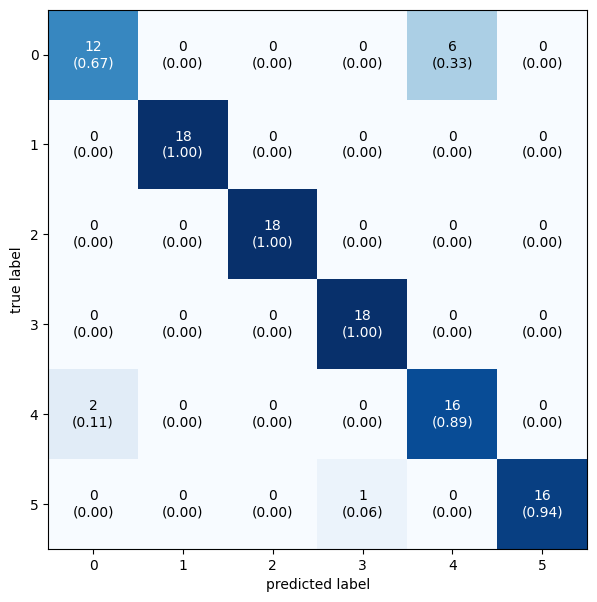

In [137]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

# ***Classification Report***

In [138]:
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("f1-score: ", f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       0.95      1.00      0.97        18
           4       0.73      0.89      0.80        18
           5       1.00      0.94      0.97        17

    accuracy                           0.92       107
   macro avg       0.92      0.92      0.92       107
weighted avg       0.92      0.92      0.91       107

Accuracy:  0.9158878504672897
Recall:  0.9158878504672897
Precision:  0.921234692508672
f1-score:  0.914937962601514


***Saving the Model***

In [139]:

model.save('model.h5')

*LSTM(EXTRA)*

In [141]:
#Build LSTM Model

from tensorflow.keras.layers import LSTM

model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(LSTM(64))
model1.add(Dropout(0.2))
model1.add(Dense(6, activation = 'softmax'))

model1.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 80, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 80, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,822 (198.52 KB)

 Trainable params: 50,822 (198.52 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:

history1 = model1.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.2267 - loss: 1.7454 - val_accuracy: 0.3271 - val_loss: 1.5489
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3290 - loss: 1.5469 - val_accuracy: 0.4206 - val_loss: 1.3768
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4222 - loss: 1.3518 - val_accuracy: 0.4299 - val_loss: 1.2277
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4882 - loss: 1.1976 - val_accuracy: 0.5981 - val_loss: 1.0750
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6147 - loss: 0.9869 - val_accuracy: 0.6822 - val_loss: 0.7862
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.7180 - loss: 0.7641 - val_accuracy: 0.6636 - val_loss: 0.7144
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7358 - loss: 0.6764 - val_accuracy: 0.7383 - val_loss: 0.5935
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7607 - loss: 0.5987 - val_accuracy: 0.7477 - 

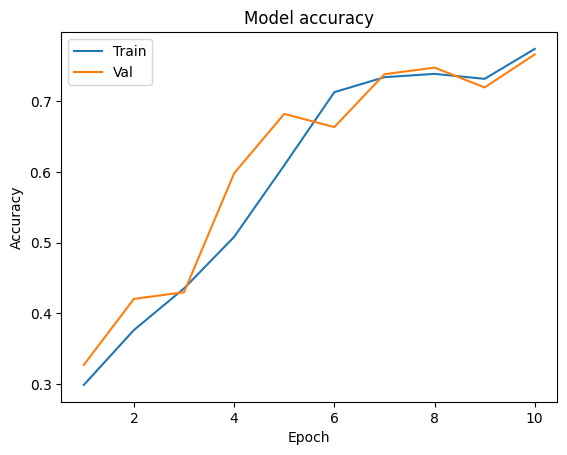

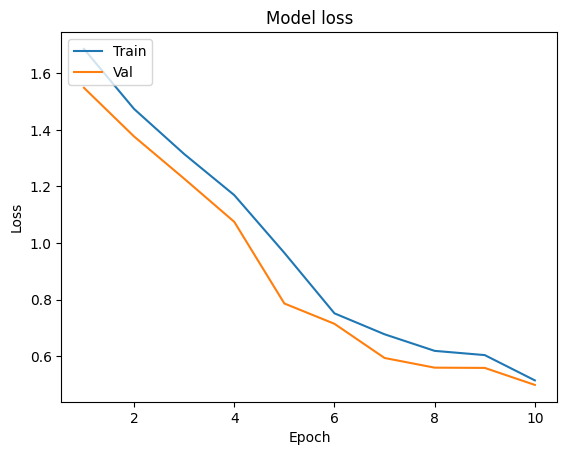

In [143]:

plot_learningCurve(history1, 10)